# Introduction on data

<!--<badge>--><a href="https://colab.research.google.com/github/kuennethgroup/MLinMS/blob/main/3_exercise/intro_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

### Generate random blobs data

`sklearn`'s `make_blobs` function generates a random isotropic Gaussian blobs dataset

**Tutorial** 

- Play with the parameters of `make_blobs` and see how the plot changes



,feat0,feat1,target
0,-5.577854,5.872988,3
1,1.627832,4.178069,1
2,-6.950884,-9.024594,4
3,-0.952769,-5.034316,2
4,6.550104,-7.912339,0
...,...,...,...
95,3.719148,3.557522,1
96,-7.697481,-8.356274,4
97,-6.745814,5.757279,3
98,-5.096242,2.231017,3


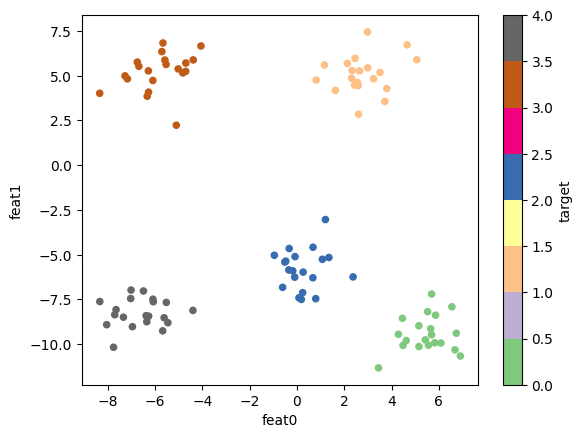

In [5]:
#!pip install scikit-learn
from sklearn.datasets import make_blobs
import pandas as pd

data = make_blobs(
    n_samples=100, centers=5, cluster_std=1, n_features=2, random_state=10
)

# Convert the data to a pandas dataframe
# data[0] == X, data[1] == y
column_names = [f"feat{n}" for n in range(data[0].shape[1])]
df_blob = pd.DataFrame(data[0], columns=column_names)

# add y (or target)
df_blob["target"] = data[1]
df_blob.plot.scatter(x="feat0", y="feat1", c="target", cmap="Accent")
df_blob

### Generate data for a regression

**Tutorial** 

- Play with the parameters of `make_regression` and see how the plot changes


,feat0,target
0,0.004291,12.326306
1,-0.255280,-7.844926
2,0.433026,8.484577
3,-0.112272,-4.211090
4,0.249179,-5.003591


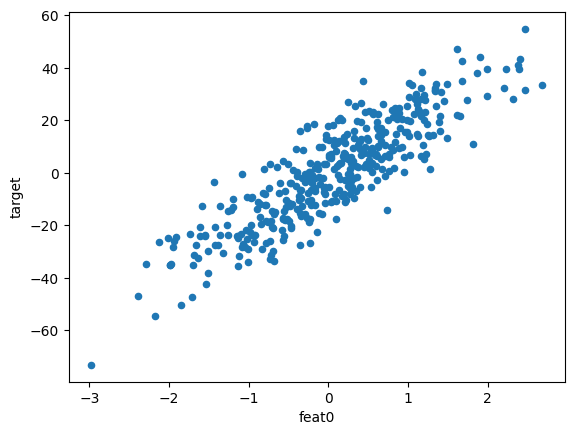

In [6]:
from sklearn.datasets import make_regression

data = make_regression(
    n_samples=400,
    random_state=10,
    noise=10,
    n_features=1,
)
# Convert data to dataframe
column_names = [f"feat{n}" for n in range(data[0].shape[1])]
df_reg = pd.DataFrame(data[0], columns=column_names)
df_reg["target"] = data[1]

# Scatter plot
df_reg.plot.scatter(y="target", x="feat0")
df_reg.head()


**Tutorial** 

- Change number of bins to 50, 100, 150, 200

<Axes: ylabel='Frequency'>

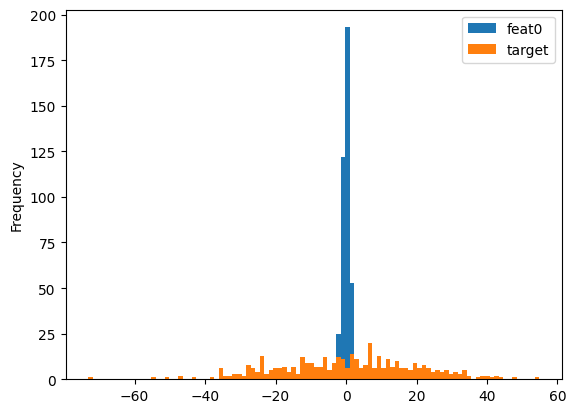

In [7]:
# Plot histogram with 200 bins
df_reg.plot.hist(bins=100)

### Split data

Read through: 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split 

For model evaluation,
- Split the dataset to 80% for training and 20% for testing the model. 
- Set the random seed to 10, making the split reproducible
- Plot `feat0` and `target` for the train and test dataset in the same plot. Use two colors to distinguish train and test


**Tutorial** 

- Change split 80/20 to 70/30
- Run without the random seed
- Change random seed to 20


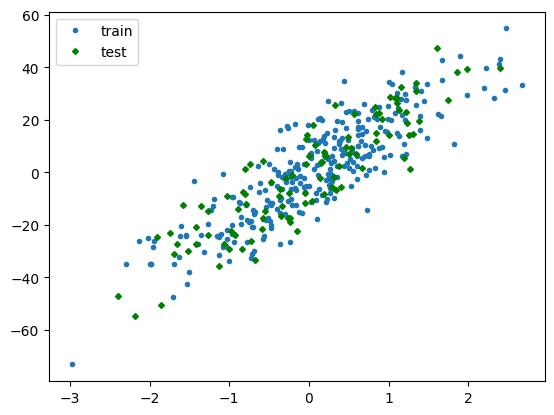

In [8]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

# Use the arguments test_size and random_state in the function
df_train, df_test = train_test_split(df_reg, random_state=10)

ax.plot(df_train["feat0"], df_train["target"], "o", ms=3, label="train")
ax.plot(df_test["feat0"], df_test["target"], "D", ms=3, color="g", label="test")
ax.legend()

### k-fold cross validation

Read through: 
[https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

For model evaluation,
- Use k-fold cross validation to split the dat
- Plot `feat0` and `target` for the each fold for the training and test data


**Tutorial** 

- Change n_splits to 3,5,8,9,10



Split 0: Test points: 80 | Train points: 320
Split 1: Test points: 80 | Train points: 320
Split 2: Test points: 80 | Train points: 320
Split 3: Test points: 80 | Train points: 320
Split 4: Test points: 80 | Train points: 320


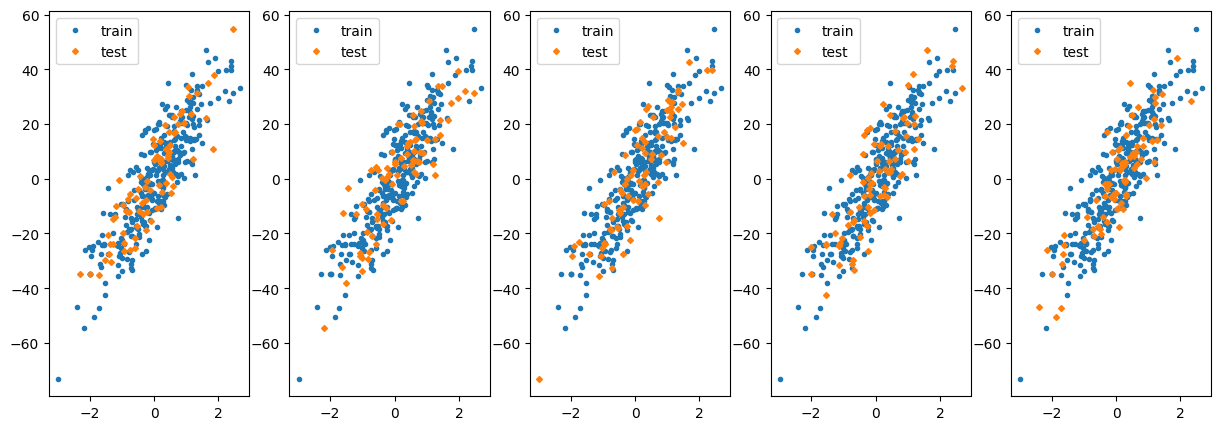

In [35]:
from sklearn.model_selection import KFold


n_splits = 5

fig, axx = plt.subplots(1, n_splits, figsize=(15, 5))

kf = KFold(n_splits=n_splits)

for num, ((train_index, test_index), ax) in enumerate(zip(kf.split(df_reg), axx)):
    df_train = df_reg.iloc[train_index]
    ax.plot(df_train["feat0"], df_train["target"], "o", ms=3, label="train")
    df_test = df_reg.iloc[test_index]
    ax.plot(df_test["feat0"], df_test["target"], "D", ms=3, label="test")
    ax.legend()

    print(f"Split {num}: Test points: {len(df_test)} | Train points: {len(df_train)}")

### Save pandas data frame

**Tutorial** 

- Save and read from parquet files

In [ ]:
df_reg.to_csv('my_data.csv
              ')
pd.read_csv('my_data.csv')